<a href="https://colab.research.google.com/github/sohamthirty/Stock-Price-Prediction-with-Sentiment-Analysis/blob/main/TweetData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Twitter data - Kaggle 2015-2020

https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020/data

Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Getting Data

In [ ]:
tweet_df = pd.read_csv("/content/drive/MyDrive/DS 5500 - CAPSTONE PROJECT/TwitterData_Kaggle/archive/Tweet.csv")

In [ ]:
tweet_df.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [ ]:
company_tweet_df = pd.read_csv("/content/drive/MyDrive/DS 5500 - CAPSTONE PROJECT/TwitterData_Kaggle/archive/Company_Tweet.csv")

In [ ]:
company_tweet_df.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [ ]:
company_df = pd.read_csv("/content/drive/MyDrive/DS 5500 - CAPSTONE PROJECT/TwitterData_Kaggle/archive/Company.csv")

In [ ]:
company_df.head()

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc


In [ ]:
# Merge dataset by tweet_id to get which tweet corresponds to which ticker
tweet_company_merge = pd.merge(tweet_df,company_tweet_df,on='tweet_id',how='inner')
tweet_company_merge.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [ ]:
# Changing Google's 2 tickers to - GOOGL
tweet_company_merge.loc[tweet_company_merge['ticker_symbol'] == 'GOOG', 'ticker_symbol'] = 'GOOGL'

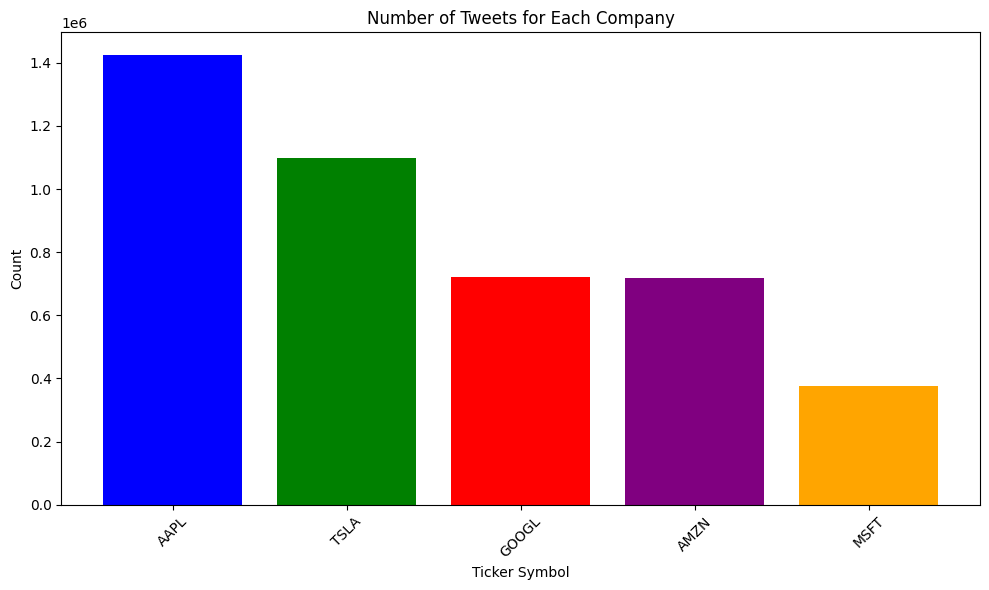

In [ ]:
# Bar plot for # of tweets per company
ticker_counts = tweet_company_merge['ticker_symbol'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(ticker_counts.index, ticker_counts.values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Ticker Symbol')
plt.ylabel('Count')
plt.title('Number of Tweets for Each Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Date to correct format
tweet_company_merge['post_date'] = pd.to_datetime(tweet_company_merge['post_date'], unit='s')
tweet_company_merge.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [ ]:
# Separate date and time
tweet_company_merge['date'] = tweet_company_merge['post_date'].dt.date
tweet_company_merge['time'] = tweet_company_merge['post_date'].dt.time

tweet_company_merge.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,00:00:57
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,00:01:36
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,00:01:50
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01,00:06:47
4,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05


In [ ]:
num_rows_merge = len(tweet_company_merge)
print("Number of rows in the tweet_company_merge:", num_rows_merge)

Number of rows in the tweet_company_merge: 4336445


In [ ]:
# Count # of tweets by month
ticker_dates = tweet_company_merge[['ticker_symbol', 'post_date']]
tweet_counts = ticker_dates.groupby(['ticker_symbol',
                                      ticker_dates['post_date'].dt.to_period("M")]).size().reset_index(level=[0,1])
tweet_counts['post_date'] = tweet_counts['post_date'].apply(lambda x: pd.to_datetime(str(x)))
tweet_counts.head()

,ticker_symbol,post_date,0
0,AAPL,2015-01-01,34308
1,AAPL,2015-02-01,34386
2,AAPL,2015-03-01,39951
3,AAPL,2015-04-01,37615
4,AAPL,2015-05-01,26054


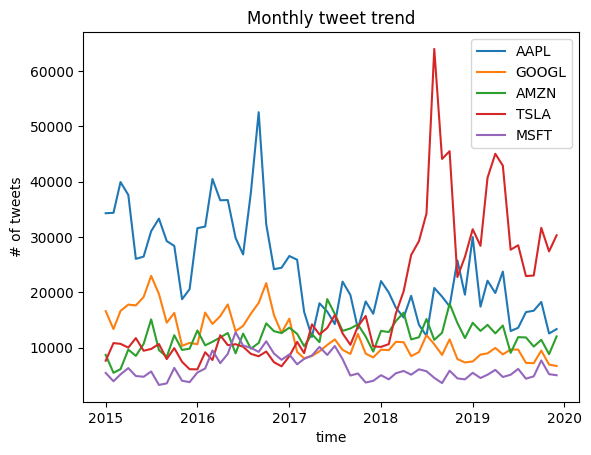

In [ ]:
# Plot to show monthly tweet trend per company
for ticker_symbol in company_df['ticker_symbol']:
  if ticker_symbol != 'GOOG':
    company_count = tweet_counts[tweet_counts['ticker_symbol']==ticker_symbol][['post_date', 0]].set_index('post_date')
    plt.plot(company_count, label=ticker_symbol)

plt.legend()
plt.ylabel('# of tweets')
plt.xlabel("time")
plt.title('Monthly tweet trend')
plt.show()